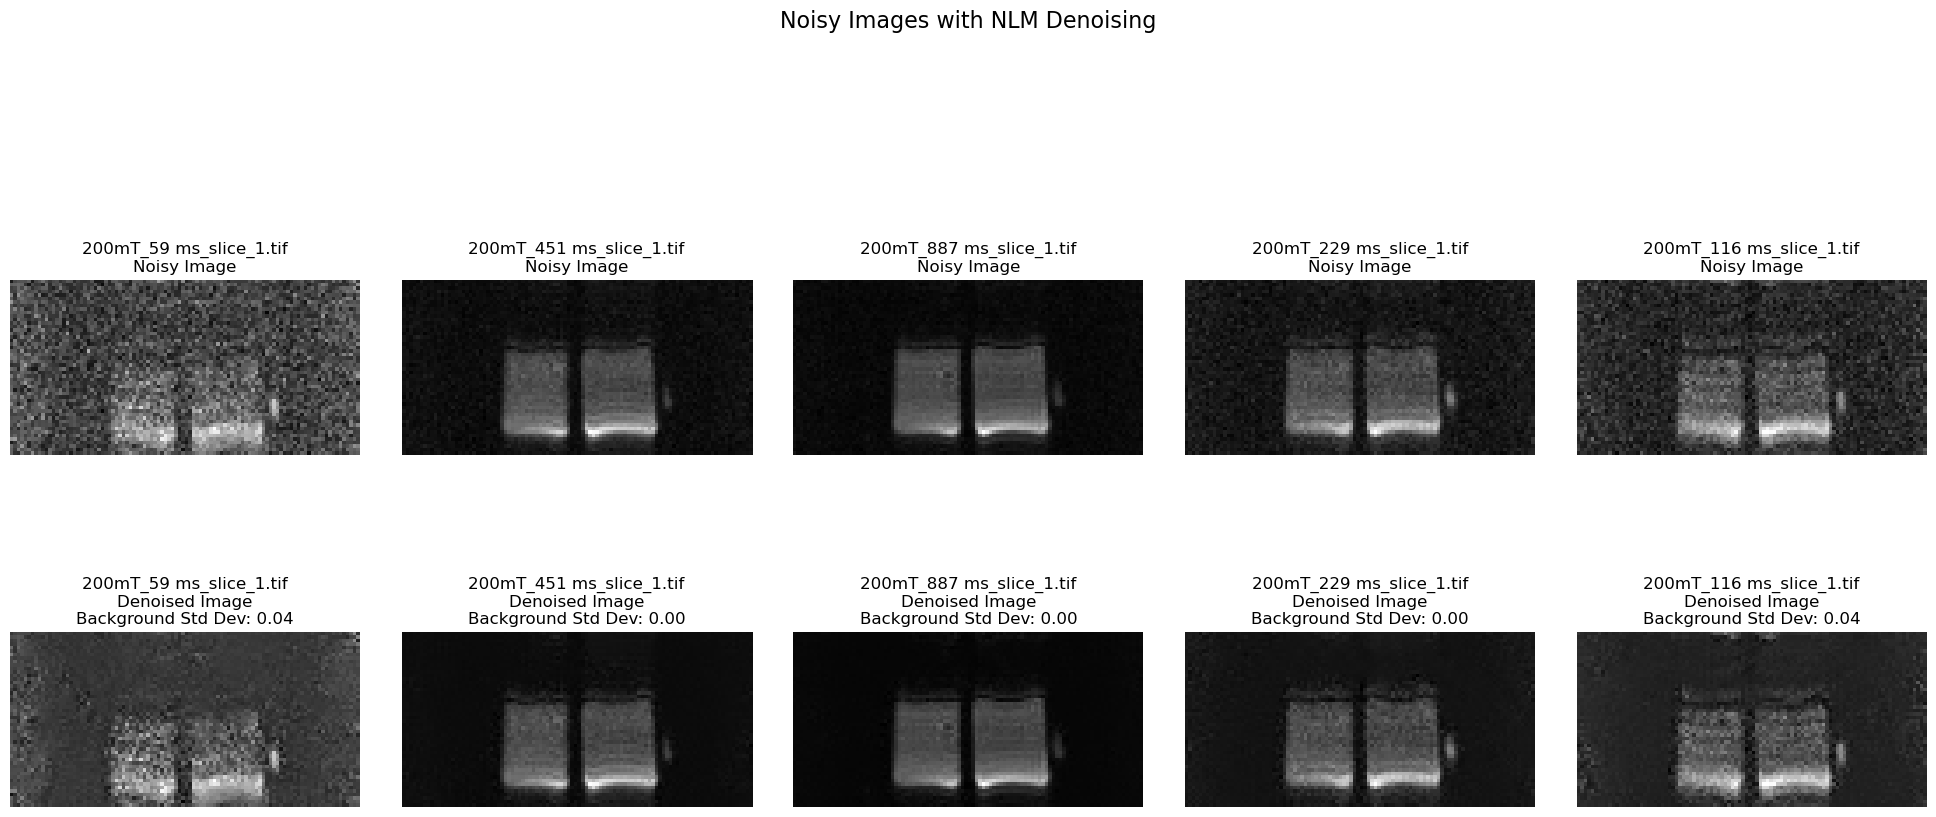

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma, denoise_nl_means
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.util import img_as_float
import os
from skimage.io import imread  # For loading images

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)

    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    background_mask = label_image == background_label
    return background_mask
def adjust_denoising_parameters(sigma_est):
    if sigma_est <= 15:
        return 0.6 * sigma_est, 7, 11  # h, patch_size, patch_distance
    elif sigma_est <= 30:
        return 0.9 * sigma_est, 5, 6
    elif sigma_est <= 50:
        return 0.2 * sigma_est, 9, 17
    else:
        return 0.4 * sigma_est, 11, 23


def denoise_and_plot(directory_path):
    plt.figure(figsize=(20, 10))  # Adjust figure size to accommodate all images
    file_list = os.listdir(directory_path)
    for i, filename in enumerate(file_list):
        if filename.endswith(".tif") or filename.endswith(".tiff"):
            image_path = os.path.join(directory_path, filename)
            noisy_image_gray = img_as_float(imread(image_path, as_gray=True))

            sigma_est = np.mean(estimate_sigma(noisy_image_gray))
            h, patch_size, patch_distance = adjust_denoising_parameters(sigma_est)
            background_mask = create_background_mask(noisy_image_gray)
            std_deviation = np.std(noisy_image_gray[background_mask])
            denoised_image = denoise_nl_means(noisy_image_gray, h=h, patch_size=patch_size,
                                              patch_distance=patch_distance, fast_mode=True)

            plt.subplot(2, len(file_list), i + 1)
            plt.imshow(noisy_image_gray, cmap='gray')
            plt.title(f'{filename}\nNoisy Image')
            plt.axis('off')

            plt.subplot(2, len(file_list), i + len(file_list) + 1)
            plt.imshow(denoised_image, cmap='gray')
            plt.title(f'{filename}\nDenoised Image\nBackground Std Dev: {std_deviation:.2f}')
            plt.axis('off')

    # Set custom ticks for x-axis based on the number of images
    x_ticks_positions = np.linspace(0, 2 * (len(file_list) - 1), len(file_list))
    x_tick_labels = [0, 2, 20] + [200] * (len(file_list) - 3)
    plt.xticks(x_ticks_positions, x_tick_labels)

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle('Noisy Images with NLM Denoising', fontsize=16, y=0.98)
    plt.show()

noisy_image_data = '../TraditionalMethods/PhantomData/200mT'
denoise_and_plot(noisy_image_data)




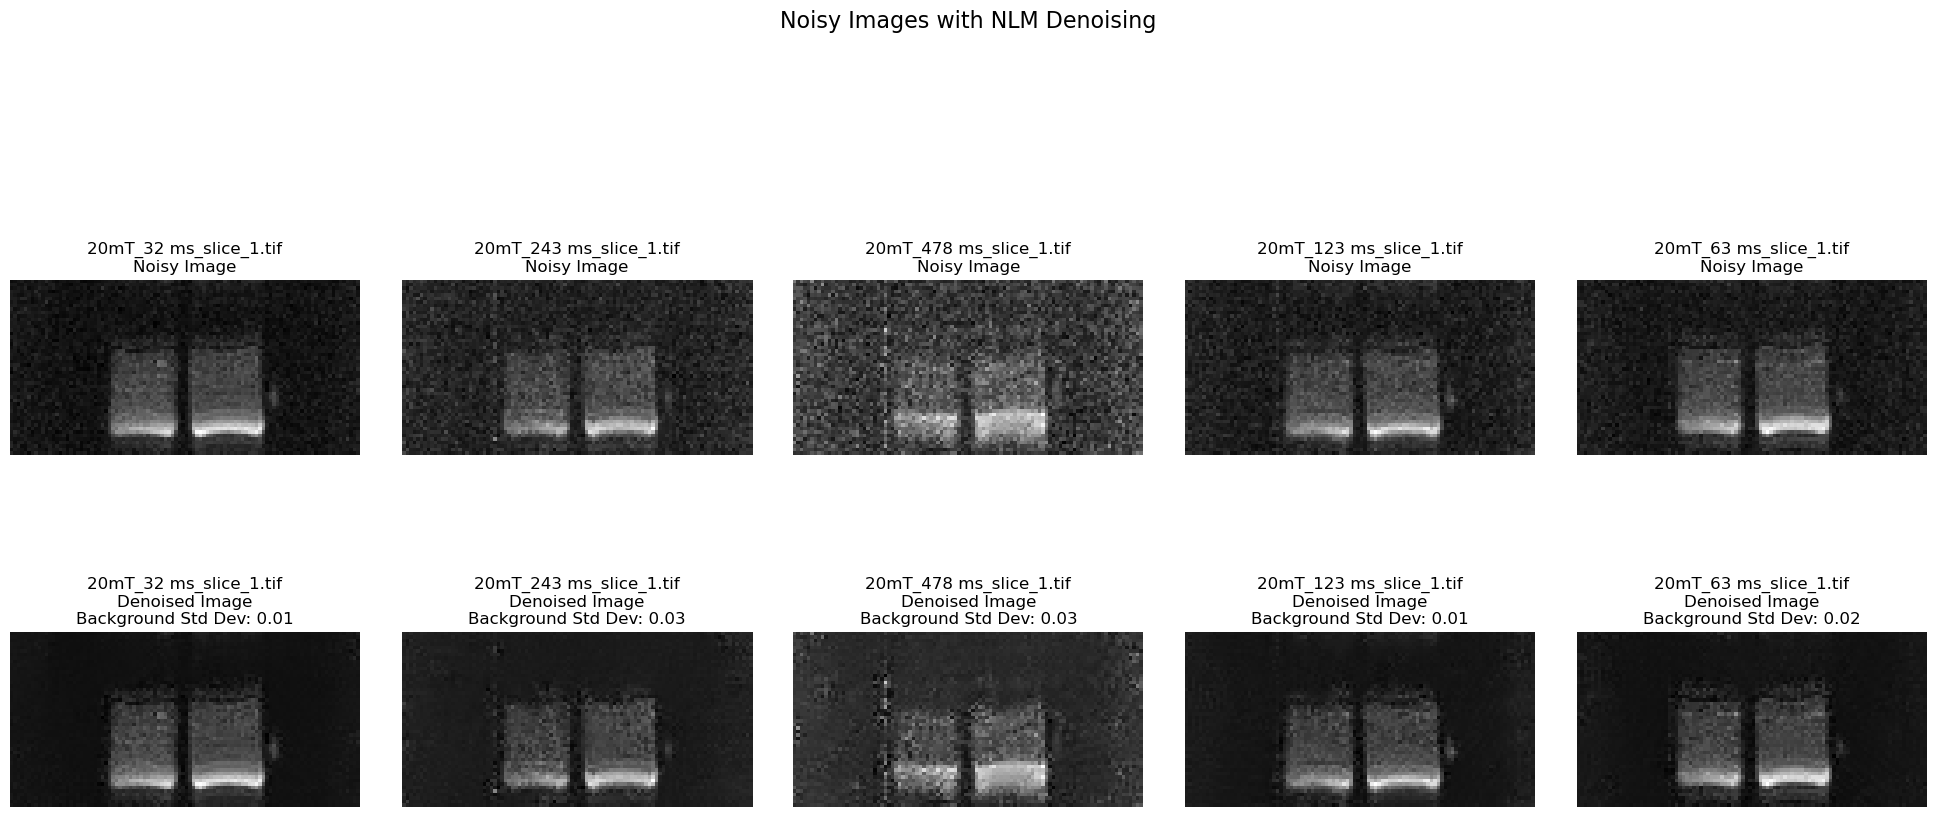

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma, denoise_nl_means
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.util import img_as_float
import os
from skimage.io import imread  # For loading images

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)

    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    background_mask = label_image == background_label
    return background_mask
def adjust_denoising_parameters(sigma_est):
    if sigma_est <= 15:
        return 0.6 * sigma_est, 7, 11  # h, patch_size, patch_distance
    elif sigma_est <= 30:
        return 0.9 * sigma_est, 5, 6
    elif sigma_est <= 50:
        return 0.2 * sigma_est, 9, 17
    else:
        return 0.4 * sigma_est, 11, 23


def denoise_and_plot(directory_path):
    plt.figure(figsize=(20, 10))  # Adjust figure size to accommodate all images
    file_list = os.listdir(directory_path)
    for i, filename in enumerate(file_list):
        if filename.endswith(".tif") or filename.endswith(".tiff"):
            image_path = os.path.join(directory_path, filename)
            noisy_image_gray = img_as_float(imread(image_path, as_gray=True))

            sigma_est = np.mean(estimate_sigma(noisy_image_gray))
            h, patch_size, patch_distance = adjust_denoising_parameters(sigma_est)
            background_mask = create_background_mask(noisy_image_gray)
            std_deviation = np.std(noisy_image_gray[background_mask])
            denoised_image = denoise_nl_means(noisy_image_gray, h=h, patch_size=patch_size,
                                              patch_distance=patch_distance, fast_mode=True)

            plt.subplot(2, len(file_list), i + 1)
            plt.imshow(noisy_image_gray, cmap='gray')
            plt.title(f'{filename}\nNoisy Image')
            plt.axis('off')

            plt.subplot(2, len(file_list), i + len(file_list) + 1)
            plt.imshow(denoised_image, cmap='gray')
            plt.title(f'{filename}\nDenoised Image\nBackground Std Dev: {std_deviation:.2f}')
            plt.axis('off')

    # Set custom ticks for x-axis based on the number of images
    x_ticks_positions = np.linspace(0, 2 * (len(file_list) - 1), len(file_list))
    x_tick_labels = [0, 2, 20] + [200] * (len(file_list) - 3)
    plt.xticks(x_ticks_positions, x_tick_labels)

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle('Noisy Images with NLM Denoising', fontsize=16, y=0.98)
    plt.show()

noisy_image_data = '../TraditionalMethods/PhantomData/20mT'
denoise_and_plot(noisy_image_data)



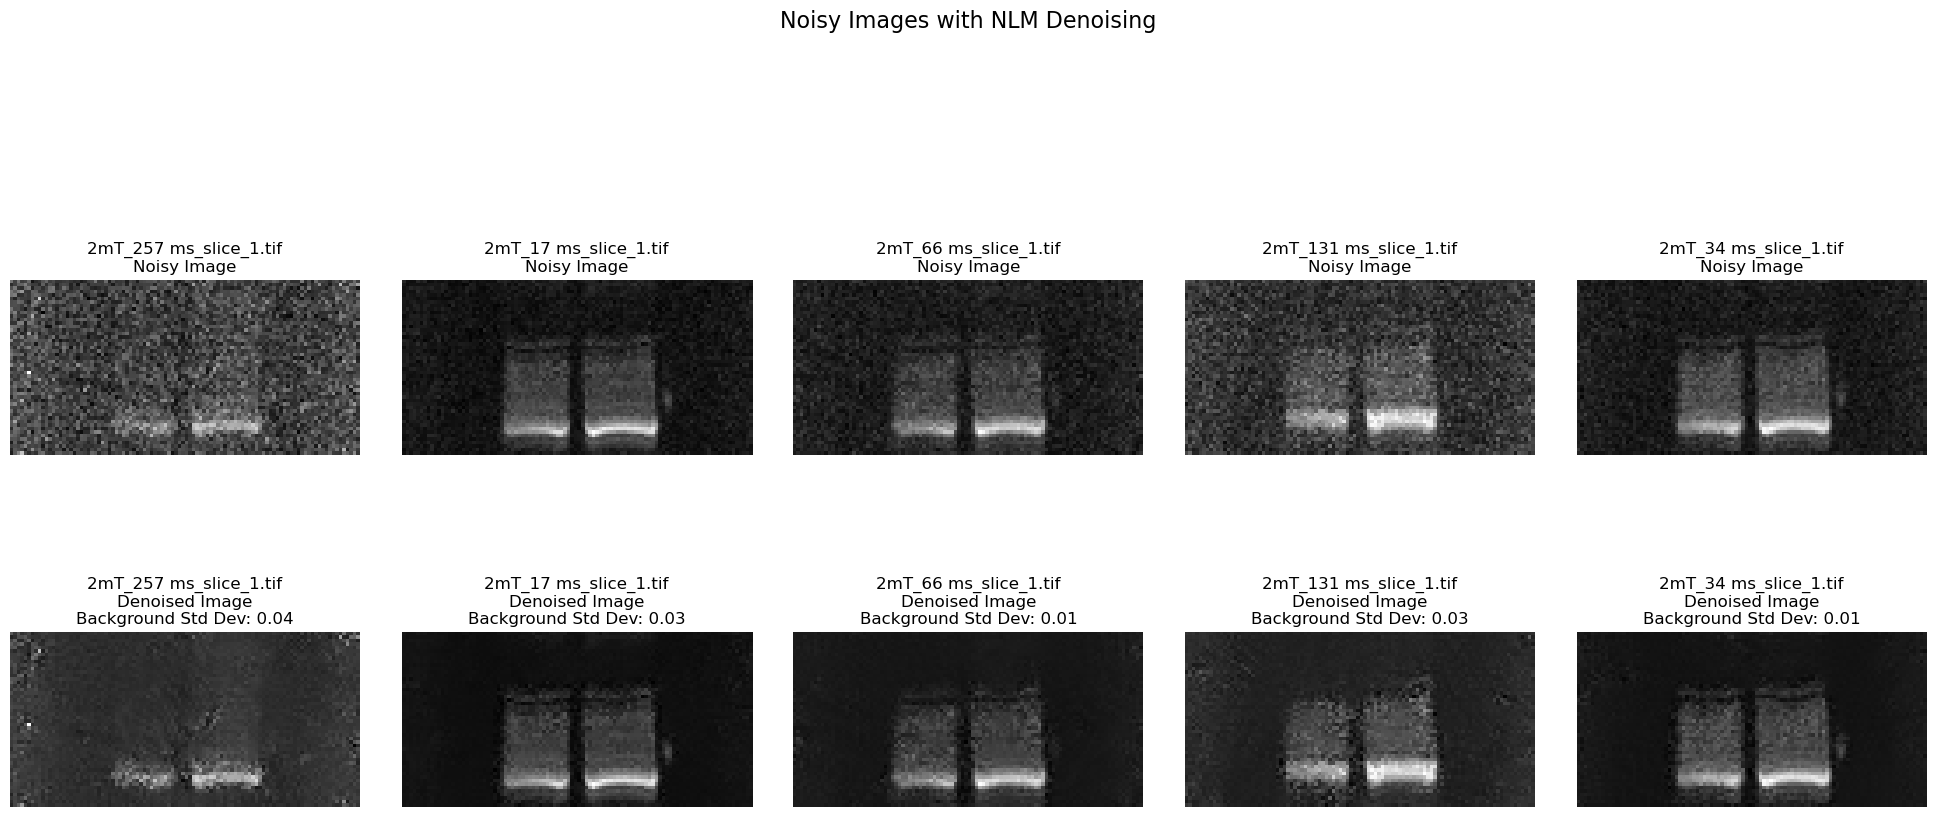

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma, denoise_nl_means
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.util import img_as_float
import os
from skimage.io import imread  # For loading images

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)

    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    background_mask = label_image == background_label
    return background_mask
def adjust_denoising_parameters(sigma_est):
    if sigma_est <= 15:
        return 0.6 * sigma_est, 7, 11  # h, patch_size, patch_distance
    elif sigma_est <= 30:
        return 0.9 * sigma_est, 5, 6
    elif sigma_est <= 50:
        return 0.2 * sigma_est, 9, 17
    else:
        return 0.4 * sigma_est, 11, 23


def denoise_and_plot(directory_path):
    plt.figure(figsize=(20, 10))  # Adjust figure size to accommodate all images
    file_list = os.listdir(directory_path)
    for i, filename in enumerate(file_list):
        if filename.endswith(".tif") or filename.endswith(".tiff"):
            image_path = os.path.join(directory_path, filename)
            noisy_image_gray = img_as_float(imread(image_path, as_gray=True))

            sigma_est = np.mean(estimate_sigma(noisy_image_gray))
            h, patch_size, patch_distance = adjust_denoising_parameters(sigma_est)
            background_mask = create_background_mask(noisy_image_gray)
            std_deviation = np.std(noisy_image_gray[background_mask])
            denoised_image = denoise_nl_means(noisy_image_gray, h=h, patch_size=patch_size,
                                              patch_distance=patch_distance, fast_mode=True)

            plt.subplot(2, len(file_list), i + 1)
            plt.imshow(noisy_image_gray, cmap='gray')
            plt.title(f'{filename}\nNoisy Image')
            plt.axis('off')

            plt.subplot(2, len(file_list), i + len(file_list) + 1)
            plt.imshow(denoised_image, cmap='gray')
            plt.title(f'{filename}\nDenoised Image\nBackground Std Dev: {std_deviation:.2f}')
            plt.axis('off')

    # Set custom ticks for x-axis based on the number of images
    x_ticks_positions = np.linspace(0, 2 * (len(file_list) - 1), len(file_list))
    x_tick_labels = [0, 2, 20] + [200] * (len(file_list) - 3)
    plt.xticks(x_ticks_positions, x_tick_labels)

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle('Noisy Images with NLM Denoising', fontsize=16, y=0.98)
    plt.show()

noisy_image_data = '../TraditionalMethods/PhantomData/2mT'
denoise_and_plot(noisy_image_data)


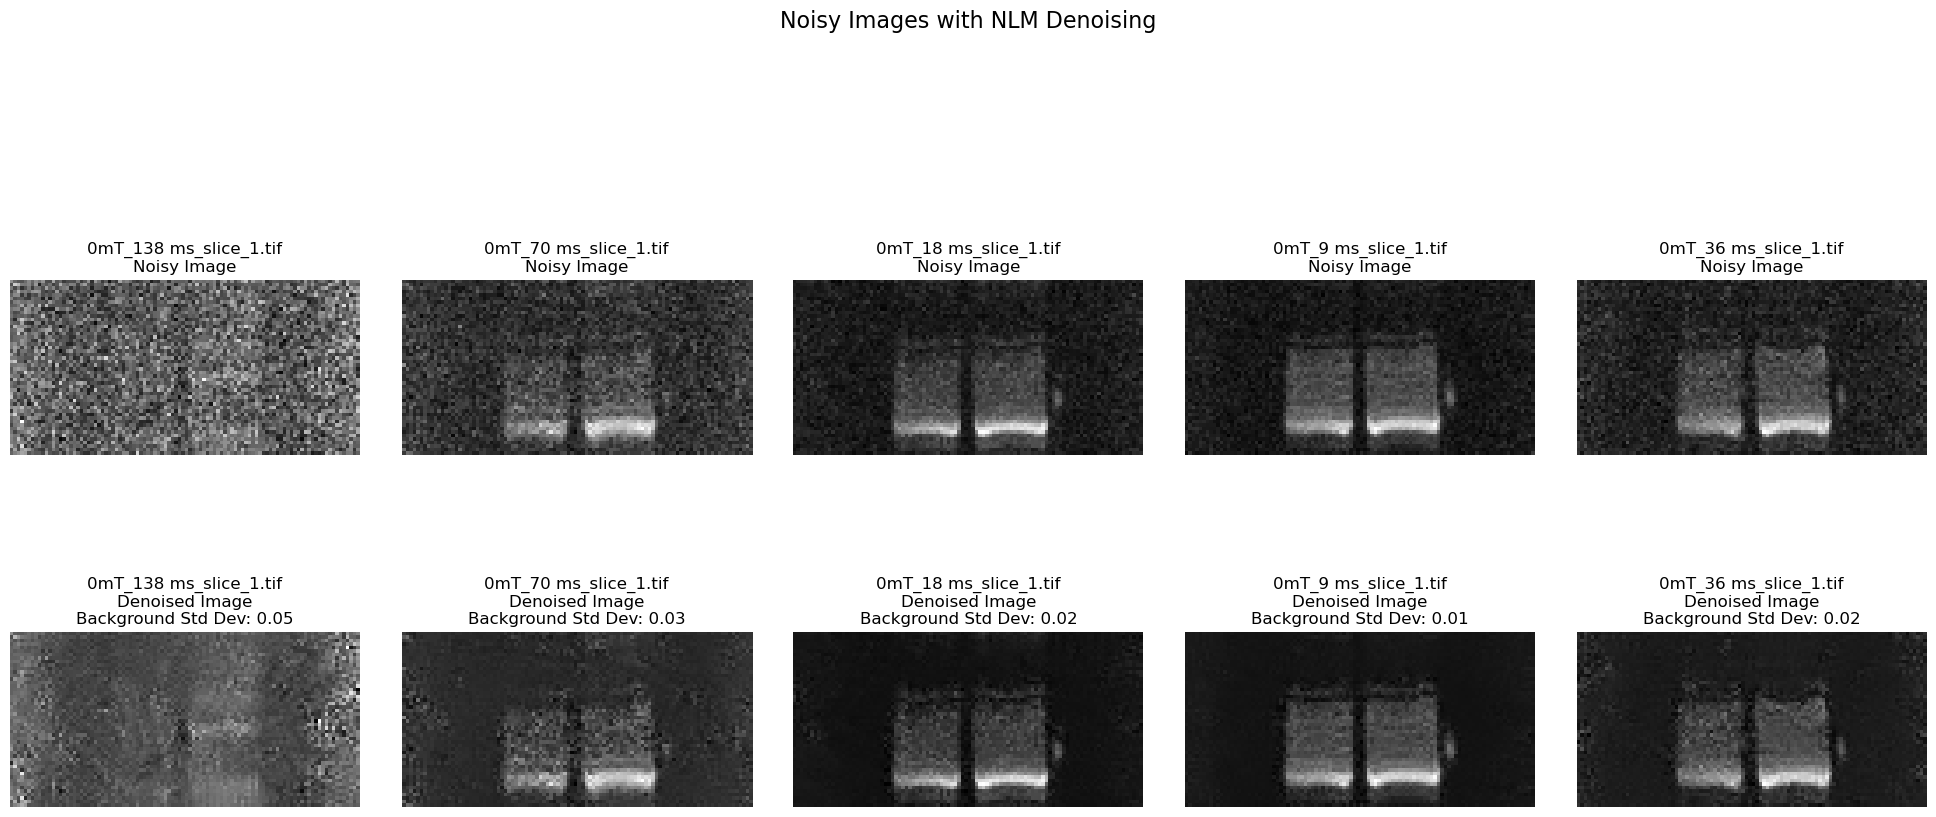

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import estimate_sigma, denoise_nl_means
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.util import img_as_float
import os
from skimage.io import imread  # For loading images

def create_background_mask(image_gray):
    thresh = threshold_otsu(image_gray)
    binary_image = image_gray <= thresh
    cleared_image = clear_border(binary_image)
    label_image = label(cleared_image)
    regions = regionprops(label_image)

    largest_area = 0
    background_label = 0
    for region in regions:
        if region.area > largest_area:
            largest_area = region.area
            background_label = region.label

    background_mask = label_image == background_label
    return background_mask
def adjust_denoising_parameters(sigma_est):
    if sigma_est <= 15:
        return 0.6 * sigma_est, 7, 11  # h, patch_size, patch_distance
    elif sigma_est <= 30:
        return 0.9 * sigma_est, 5, 6
    elif sigma_est <= 50:
        return 0.2 * sigma_est, 9, 17
    else:
        return 0.4 * sigma_est, 11, 23


def denoise_and_plot(directory_path):
    plt.figure(figsize=(20, 10))  # Adjust figure size to accommodate all images
    file_list = os.listdir(directory_path)
    for i, filename in enumerate(file_list):
        if filename.endswith(".tif") or filename.endswith(".tiff"):
            image_path = os.path.join(directory_path, filename)
            noisy_image_gray = img_as_float(imread(image_path, as_gray=True))

            sigma_est = np.mean(estimate_sigma(noisy_image_gray))
            h, patch_size, patch_distance = adjust_denoising_parameters(sigma_est)
            background_mask = create_background_mask(noisy_image_gray)
            std_deviation = np.std(noisy_image_gray[background_mask])
            denoised_image = denoise_nl_means(noisy_image_gray, h=h, patch_size=patch_size,
                                              patch_distance=patch_distance, fast_mode=True)

            plt.subplot(2, len(file_list), i + 1)
            plt.imshow(noisy_image_gray, cmap='gray')
            plt.title(f'{filename}\nNoisy Image')
            plt.axis('off')

            plt.subplot(2, len(file_list), i + len(file_list) + 1)
            plt.imshow(denoised_image, cmap='gray')
            plt.title(f'{filename}\nDenoised Image\nBackground Std Dev: {std_deviation:.2f}')
            plt.axis('off')

    # Set custom ticks for x-axis based on the number of images
    x_ticks_positions = np.linspace(0, 2 * (len(file_list) - 1), len(file_list))
    x_tick_labels = [0, 2, 20] + [200] * (len(file_list) - 3)
    plt.xticks(x_ticks_positions, x_tick_labels)

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.85)
    plt.suptitle('Noisy Images with NLM Denoising', fontsize=16, y=0.98)
    plt.show()

noisy_image_data = '../TraditionalMethods/PhantomData/OmT'
denoise_and_plot(noisy_image_data)